In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("Churn-Modelling.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# removing the irrelevant columns
cols_to_drop = ["RowNumber","CustomerId","Surname"]
df = df.drop(columns=cols_to_drop,axis=1)
# first five rows of dataframe after removing columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
deep_df = df.copy(deep = True)

In [0]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']

In [40]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,350.0000,18.0000,0.0000,0.000000,1.0000,0.0000,0.0000,11.580000
max,850.0000,92.0000,10.0000,250898.090000,4.0000,1.0000,1.0000,199992.480000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,1.0000,100193.915000


In [41]:
df[df['EstimatedSalary'] == df['EstimatedSalary'].min()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


In [42]:
percentages = []
for gen in list(df["Gender"].unique()):
    
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46


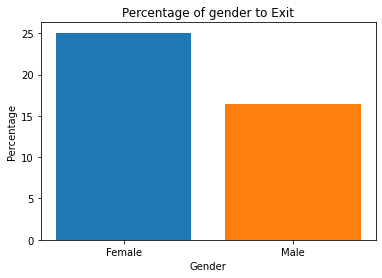

In [43]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Female','Male'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.show()

In [44]:
percentages = []
for country in list(df["Geography"].unique()):
    
    p = round((df["Exited"][df["Geography"]==country].value_counts()[1]/df["Exited"][df["Geography"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(% to exit) : ", p)

France (% to exit) :  16.15
Spain (% to exit) :  16.67
Germany (% to exit) :  32.44


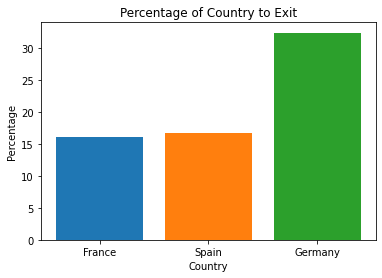

In [45]:
for i in range(len(percentages)):
    plt.bar(i, percentages[i])
plt.xticks((0,1,2), ('France', 'Spain', 'Germany'))
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Percentage of Country to Exit")
plt.show()



Text(0, 0.5, 'Frequency')

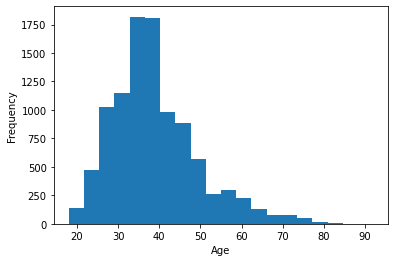

In [46]:
plt.hist(df["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'People who did not Exit (Exited = 0)')

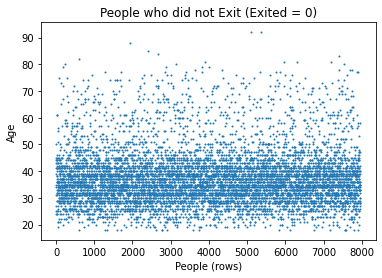

In [47]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==0]))),y=df["Age"][df["Exited"]==0],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who did not Exit (Exited = 0)")

Text(0.5, 1.0, 'People who Exited (Exited = 1)')

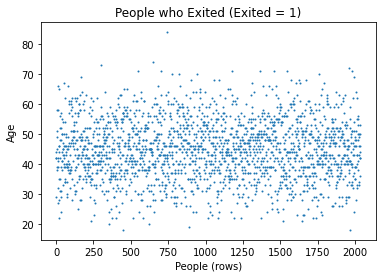

In [48]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==1]))),y=df["Age"][df["Exited"]==1],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who Exited (Exited = 1)")


In [0]:
age_bucket = df.groupby(pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100]))

In [0]:
age_bucket = round((age_bucket.sum()["Exited"] / age_bucket.size())*100 , 2)

Text(0.5, 1.0, 'Percentage of people in different Age Groups that exited')

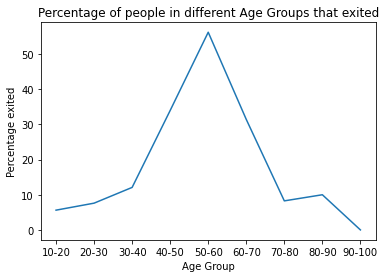

In [51]:
x = [str(i)+"-"+str(i+10) for i in range(10,91,10)]
plt.plot(x,age_bucket.values)
plt.xlabel("Age Group")
plt.ylabel("Percentage exited")
plt.title("Percentage of people in different Age Groups that exited")


In [52]:
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


In [53]:
df = pd.get_dummies(df)
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [0]:
df = df.drop(columns=["Geography_France","Gender_Female"],axis=1)

In [0]:
df = df.iloc[:,:-1]

In [0]:
df.to_csv('Clean_data.csv')

In [59]:
df = pd.read_csv('Clean_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
 12  Age_(10, 20]       10000 non-null  int64  
 13  Age_(20, 30]       10000 non-null  int64  
 14  Age_(30, 40]       10000 non-null  int64  
 15  Age_(40, 50]       10000 non-null  int64  
 16  Age_(50, 60]       1000

,Unnamed: 0,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]"
0,0,619,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,1,0,0,0
1,1,608,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0,0,0
2,2,502,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0,0,0
3,3,699,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0,0
4,4,850,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,1,0,0,0


In [0]:
feat = df.drop(columns=['Exited'],axis=1)
label = df["Exited"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [0]:
from sklearn.svm import SVC

In [0]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

[[2314   68]
 [ 361  257]]



In [72]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  85.7 %
